In [1]:
import numpy as np
import matplotlib
import pandas as pd
from pathlib import Path
import seaborn as sns
sns.set()
import matplotlib.pyplot as plt

In [2]:
# python -m cProfile -s time my_script.py > profile.text 2>&1

Load the results of the last simulation run 

In [3]:
sim_results_file = '_lastrun.csv'
sim_results_path = Path('..', 'sim_results', sim_results_file)
results = pd.read_csv(sim_results_path)
results.head()

,n,m,seed,cputime,iterations,solver
0,2,2,1,0.122719,1,FMLSolver
1,2,2,2,0.350519,3,FMLSolver
2,2,2,3,1.054344,9,FMLSolver
3,2,2,4,0.705420,6,FMLSolver
4,2,2,5,0.461358,4,FMLSolver


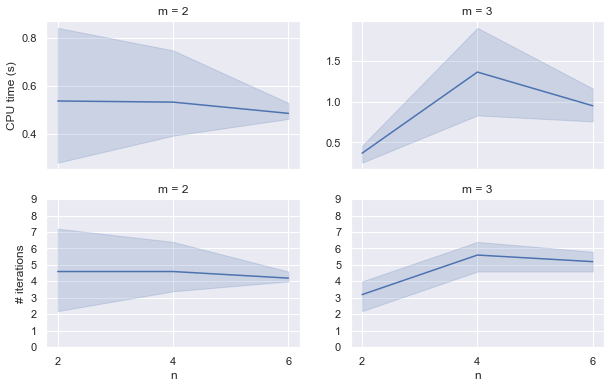

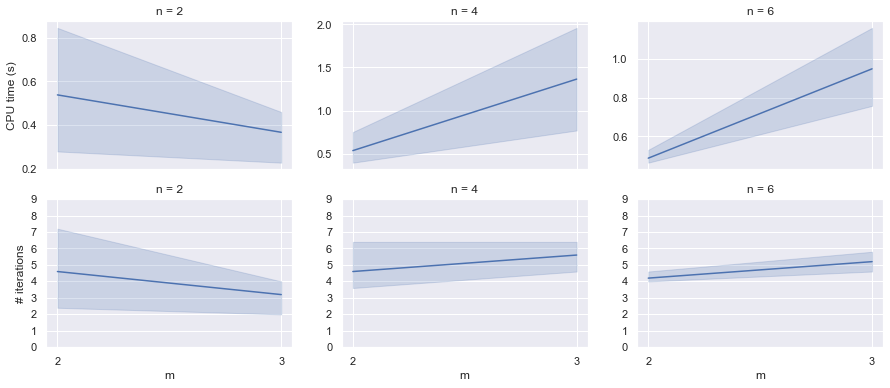

In [8]:
for x_variable, columns_variable in (('n', 'm'), ('m', 'n')):

    columns = results[columns_variable].unique()
    
    _, axs = plt.subplots(
        figsize=(len(columns) * 5, 6),
        nrows=2,
        ncols=len(columns),
        sharex=True
    )
    
    min_y_tick_iters = int(results['iterations'].min()) - 1
    max_y_tick_iters = int(results['iterations'].max()) + 1
    y_ticks_iters = np.arange(min_y_tick_iters, max_y_tick_iters)
    x_ticks = results[x_variable].unique()

    label_mapping = {'cputime': 'CPU time (s)', 'iterations': '# iterations'}

    for i, (var_to_plot, label) in enumerate(label_mapping.items()):
        for column, ax in zip(columns, axs[i]):
            ax.set_xticks(x_ticks)
            results_ = results[lambda df: df[columns_variable].eq(column)]

            sns.lineplot(data=results_, x=x_variable, y=var_to_plot, ax=ax, ci=95)

            if ax is axs[i][0]:
                ax.set_ylabel(label)
            else:
                ax.set_ylabel('')
            ax.set_title(f'{columns_variable} = {column}')

            if var_to_plot == 'iterations':
                ax.set_yticks(y_ticks_iters)
                
    plt.show()
